In [2]:
import numpy as np 
from time import time
import matplotlib.pyplot as plt
import collections
import pickle
import csv
from scipy import interpolate
from scipy.optimize import curve_fit

from quspin.operators import hamiltonian # Hamiltonians and operators
from quspin.basis import spinful_fermion_basis_1d, spinful_fermion_basis_general # Hilbert spaces

from modules.hubbard import *
from modules.pluckers import *
from modules.functions import *

%load_ext autoreload
%autoreload 2
plt.rcParams["figure.figsize"] = (9,6)


folder_for_figures = 'results_Hubbard/figures_Hubbard/'
folder_for_data = 'results_Hubbard/data_Hubbard/'

mu = 0 # chemical potential
symmetry = 0.5 # symmetry between spin up and down
J = 1 # hopping constant

In [2]:
import seaborn as sns
sns.set(style="whitegrid", context="talk", font_scale=1.4, palette=sns.color_palette("bright"), color_codes=False)
plt.rcParams["figure.figsize"] = (12,7.5)

# Hubbard GS, second Plucker

In [38]:
filling = 0.5 # half-filling
L = 6 # system size
U_array = np.around(np.linspace(0, 100, 100),1)
U_max = U_array[-1]
gamma = 1
B = gamma * gap_1D(U_max) * stagger(L)

Plucker_measures = []

for U in U_array:
    if U%10 == 0:
        print(U)
    basis, E_GS, vec_GS = ground_state(L, U, B, mu, filling)
    Plucker_measures.append(np.real(HigherC(vec_GS, basis, 1)))

filename_pluckers = folder_for_data + 'Plucker_first_GS_L={}_Nf={}_B={}.pkl'.format(L, int(2 * L * filling), gamma * gap_1D(U_max))
with open(filename_pluckers, 'wb') as f_P:
        pickle.dump([U_array, Plucker_measures], f_P)

0.0
100.0


# Higher Pluckers

In [ ]:
filling = 0.5 # half-filling
L = 8 # system size
B = np.zeros(L) # coordinate-dependent magnetic field 
U =  100*J # Coulomb interaction in terms of J
label = "GS"

if label=="GS":
    level = 0
    filename_pluckers = folder_for_data + 'Pluckers_GS_U={}J_L={}_Nf={}.pkl'.format(U, L, int(2 * L * filling))
    
    [basis, [E, vectors]] = eigensystem_k_lowest(L, U, B, 1, mu, filling)
    Pluckers_temp = PluckersSpinfull(L, basis, np.transpose(vectors)[level])
    
    with open(filename_pluckers, 'wb') as f_P:
        pickle.dump(Pluckers_temp, f_P)
        
        
if label=="bulk":
    filename_pluckers = folder_for_data + 'Pluckers_bulk_U={}J_L={}_Nf={}.pkl'.format(U, L, int(2 * L * filling))
    [basis, [E, vectors]] = eigensystem(L, U, B, mu, filling)
    level = basis.Ns//2
    Pluckers_temp = PluckersSpinfull(L, basis, np.transpose(vectors)[level])
    
    with open(filename_pluckers, 'wb') as f_P:
        pickle.dump(Pluckers_temp, f_P)

#### Reading data

[1.0000000000000004, 0.9936406995230527, 0.9936406995230527]


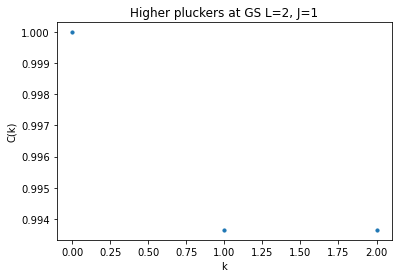

In [20]:
filling = 0.5 # half-filling
L = 2 # system size
B = np.zeros(L) # coordinate-dependent magnetic field 
U =  100*J # Coulomb interaction in terms of J
label = "GS"

if label=="GS":
    filename_pluckers = folder_for_data + 'Pluckers_GS_U={}J_L={}_Nf={}.pkl'.format(U, L, int(2 * L * filling))
    with open(filename_pluckers, 'rb') as f:
         C = pickle.load(f)
    plt.scatter(range(len(C)), C, s=10, marker = 'o');
    plt.title("Higher pluckers at GS L={}, J={}".format(L, J))
    plt.xlabel("k")
    plt.ylabel("C(k)")
    
if label=="bulk":
    filename_pluckers = folder_for_data + 'Pluckers_bulk_U={}J_L={}_Nf={}.pkl'.format(U, L, int(2 * L * filling))
    with open(filename_pluckers, 'rb') as f:
         C = pickle.load(f)
    plt.scatter(range(len(C)), C, s=10, marker = 'o');
    plt.title("Higher pluckers at bulk L={}, J={}".format(L, J))
    plt.xlabel("k")
    plt.ylabel("C(k)")
print(C)

## Pluckers for the custom excited states (by percents of the total number of states)

In [30]:
filling = 0.5 # half-filling
L = 6 # system size
B = np.zeros(L) # coordinate-dependent magnetic field 
U =  1*J # Coulomb interaction in terms of J
d = 0

[basis, [E, vectors]] = eigensystem(L, U, B, mu, filling)
if d == 1:
    level = basis.Ns - 1
elif d == 0:
    level = 0
else:
    level = int(basis.Ns*d)

print("The state of number {} of {}".format(level, basis.Ns))    
Pluckers_temp = PluckersSpinfull(L, basis, np.transpose(vectors)[level])

filename_pluckers = folder_for_data + 'Pluckers_custom_d={:.2f}_U={}J_L={}_Nf={}.pkl'.format(d, U, L, int(2 * L * filling))
with open(filename_pluckers, 'wb') as f_P:
    pickle.dump(Pluckers_temp, f_P)

The state of number 0 of 400
We calculated 0 Plucker of 6 to be 1.0 for 0.00 seconds
We calculated 1 Plucker of 6 to be 0.0008044845634073983 for 0.07 seconds
We calculated 2 Plucker of 6 to be 0.0008046866849865282 for 1.94 seconds
We calculated 3 Plucker of 6 to be 4.0425879667101497e-07 for 17.69 seconds
We calculated 4 Plucker of 6 to be 2.0216849291095768e-07 for 92.87 seconds
We calculated 5 Plucker of 6 to be 4.691355031712294e-11 for 238.35 seconds
We calculated 6 Plucker of 6 to be 1.5637850964171128e-11 for 252.25 seconds


Text(0.5, 1.0, 'Higher pluckers of Hubbard bulk states, L=6, U=0.1')

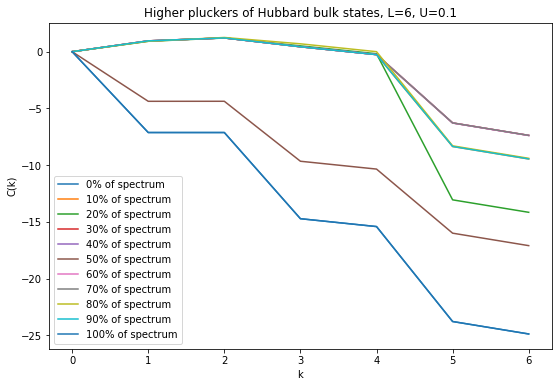

In [32]:
filling = 0.5 # half-filling
L = 6 # system size
B = np.zeros(L) # coordinate-dependent magnetic field 
U =  0.1*J # Coulomb interaction in terms of J
ds = np.linspace(0,1,11)

for d in ds:    
    filename_pluckers = folder_for_data + 'Pluckers_custom_d={:.2f}_U={}J_L={}_Nf={}.pkl'.format(d, U, L, int(2 * L * filling))
    with open(filename_pluckers, 'rb') as f:
         C = pickle.load(f)
    plt.plot(range(len(C)), np.log(C), label='{:.0f}% of spectrum'.format(100*d))

plt.xlabel("k")
plt.ylabel("C(k)")
plt.legend()
plt.title("Higher pluckers of Hubbard bulk states, L={}, U={}".format(L, U))

## Pluckers for the lowest energy states

In [3]:
filling = 0.5 # half-filling
L = 6 # system size
B = np.zeros(L) # coordinate-dependent magnetic field 
U =  1*J # Coulomb interaction in terms of J
level = 21

[basis, [E, vectors]] = eigensystem(L, U, B, mu, filling)

print("The state of number {} of {}".format(level, basis.Ns))    
Pluckers_temp = PluckersSpinfull(L, basis, np.transpose(vectors)[level])

filename_pluckers = folder_for_data + 'Pluckers_lowest_k={}_U={}J_L={}_Nf={}.pkl'.format(level, U, L, int(2 * L * filling))
with open(filename_pluckers, 'wb') as f_P:
    pickle.dump(Pluckers_temp, f_P)

The state of number 21 of 400
We calculated 0 Plucker of 6 to be 0.9999999999999987 for 0.05 seconds
We calculated 1 Plucker of 6 to be 1.4542714851714775 for 0.09 seconds
We calculated 2 Plucker of 6 to be 1.51660172778638 for 1.73 seconds
We calculated 3 Plucker of 6 to be 0.12613087895518496 for 25.84 seconds
We calculated 4 Plucker of 6 to be 0.06674142379104799 for 95.02 seconds
We calculated 5 Plucker of 6 to be 0.00441118117614165 for 201.77 seconds
We calculated 6 Plucker of 6 to be 0.0014703937253804705 for 223.10 seconds


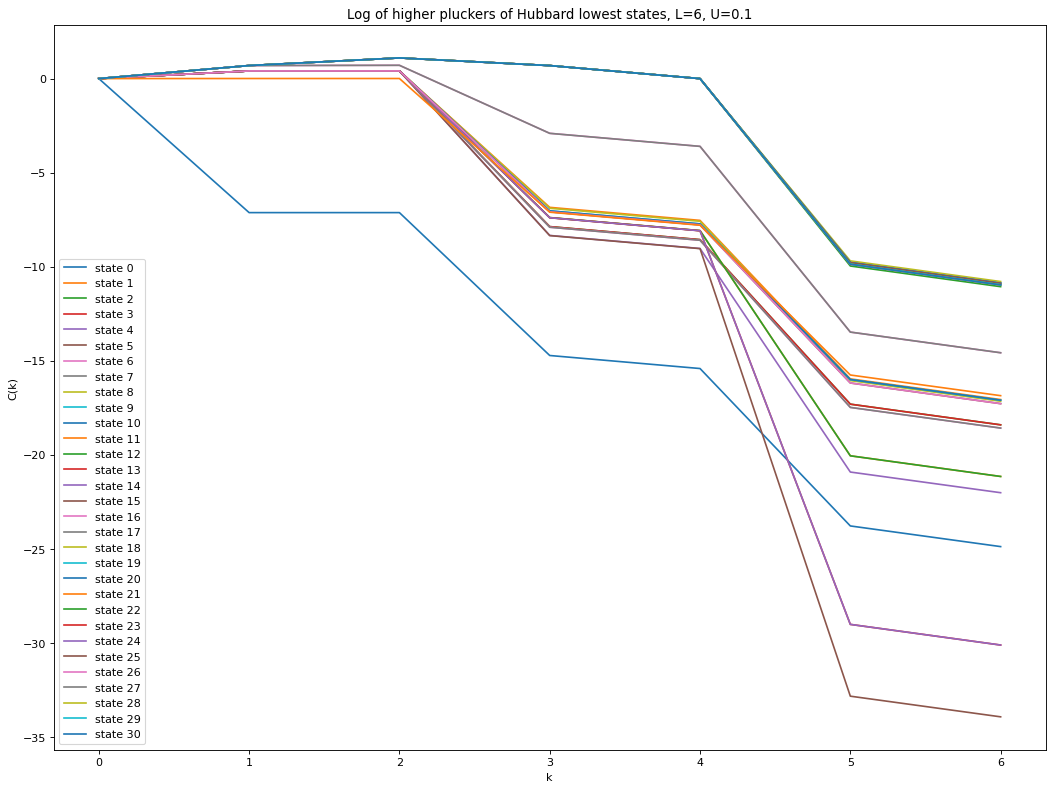

In [2]:
filling = 0.5 # half-filling
L = 6 # system size
B = np.zeros(L) # coordinate-dependent magnetic field 
U =  0.1*J # Coulomb interaction in terms of J
ks = range(31)

plt.figure(figsize=(16, 12), dpi=80)
for k in ks:    
    filename_pluckers = folder_for_data + 'Pluckers_lowest_k={}_U={}J_L={}_Nf={}.pkl'.format(k, U, L, int(2 * L * filling))
    with open(filename_pluckers, 'rb') as f:
         C = pickle.load(f)
    plt.plot(range(len(C)), np.log(C), label='state {}'.format(k))

plt.xlabel("k")
plt.ylabel("C(k)")
plt.legend()
plt.title("Log of higher pluckers of Hubbard lowest states, L={}, U={}".format(L, U))
plt.show()

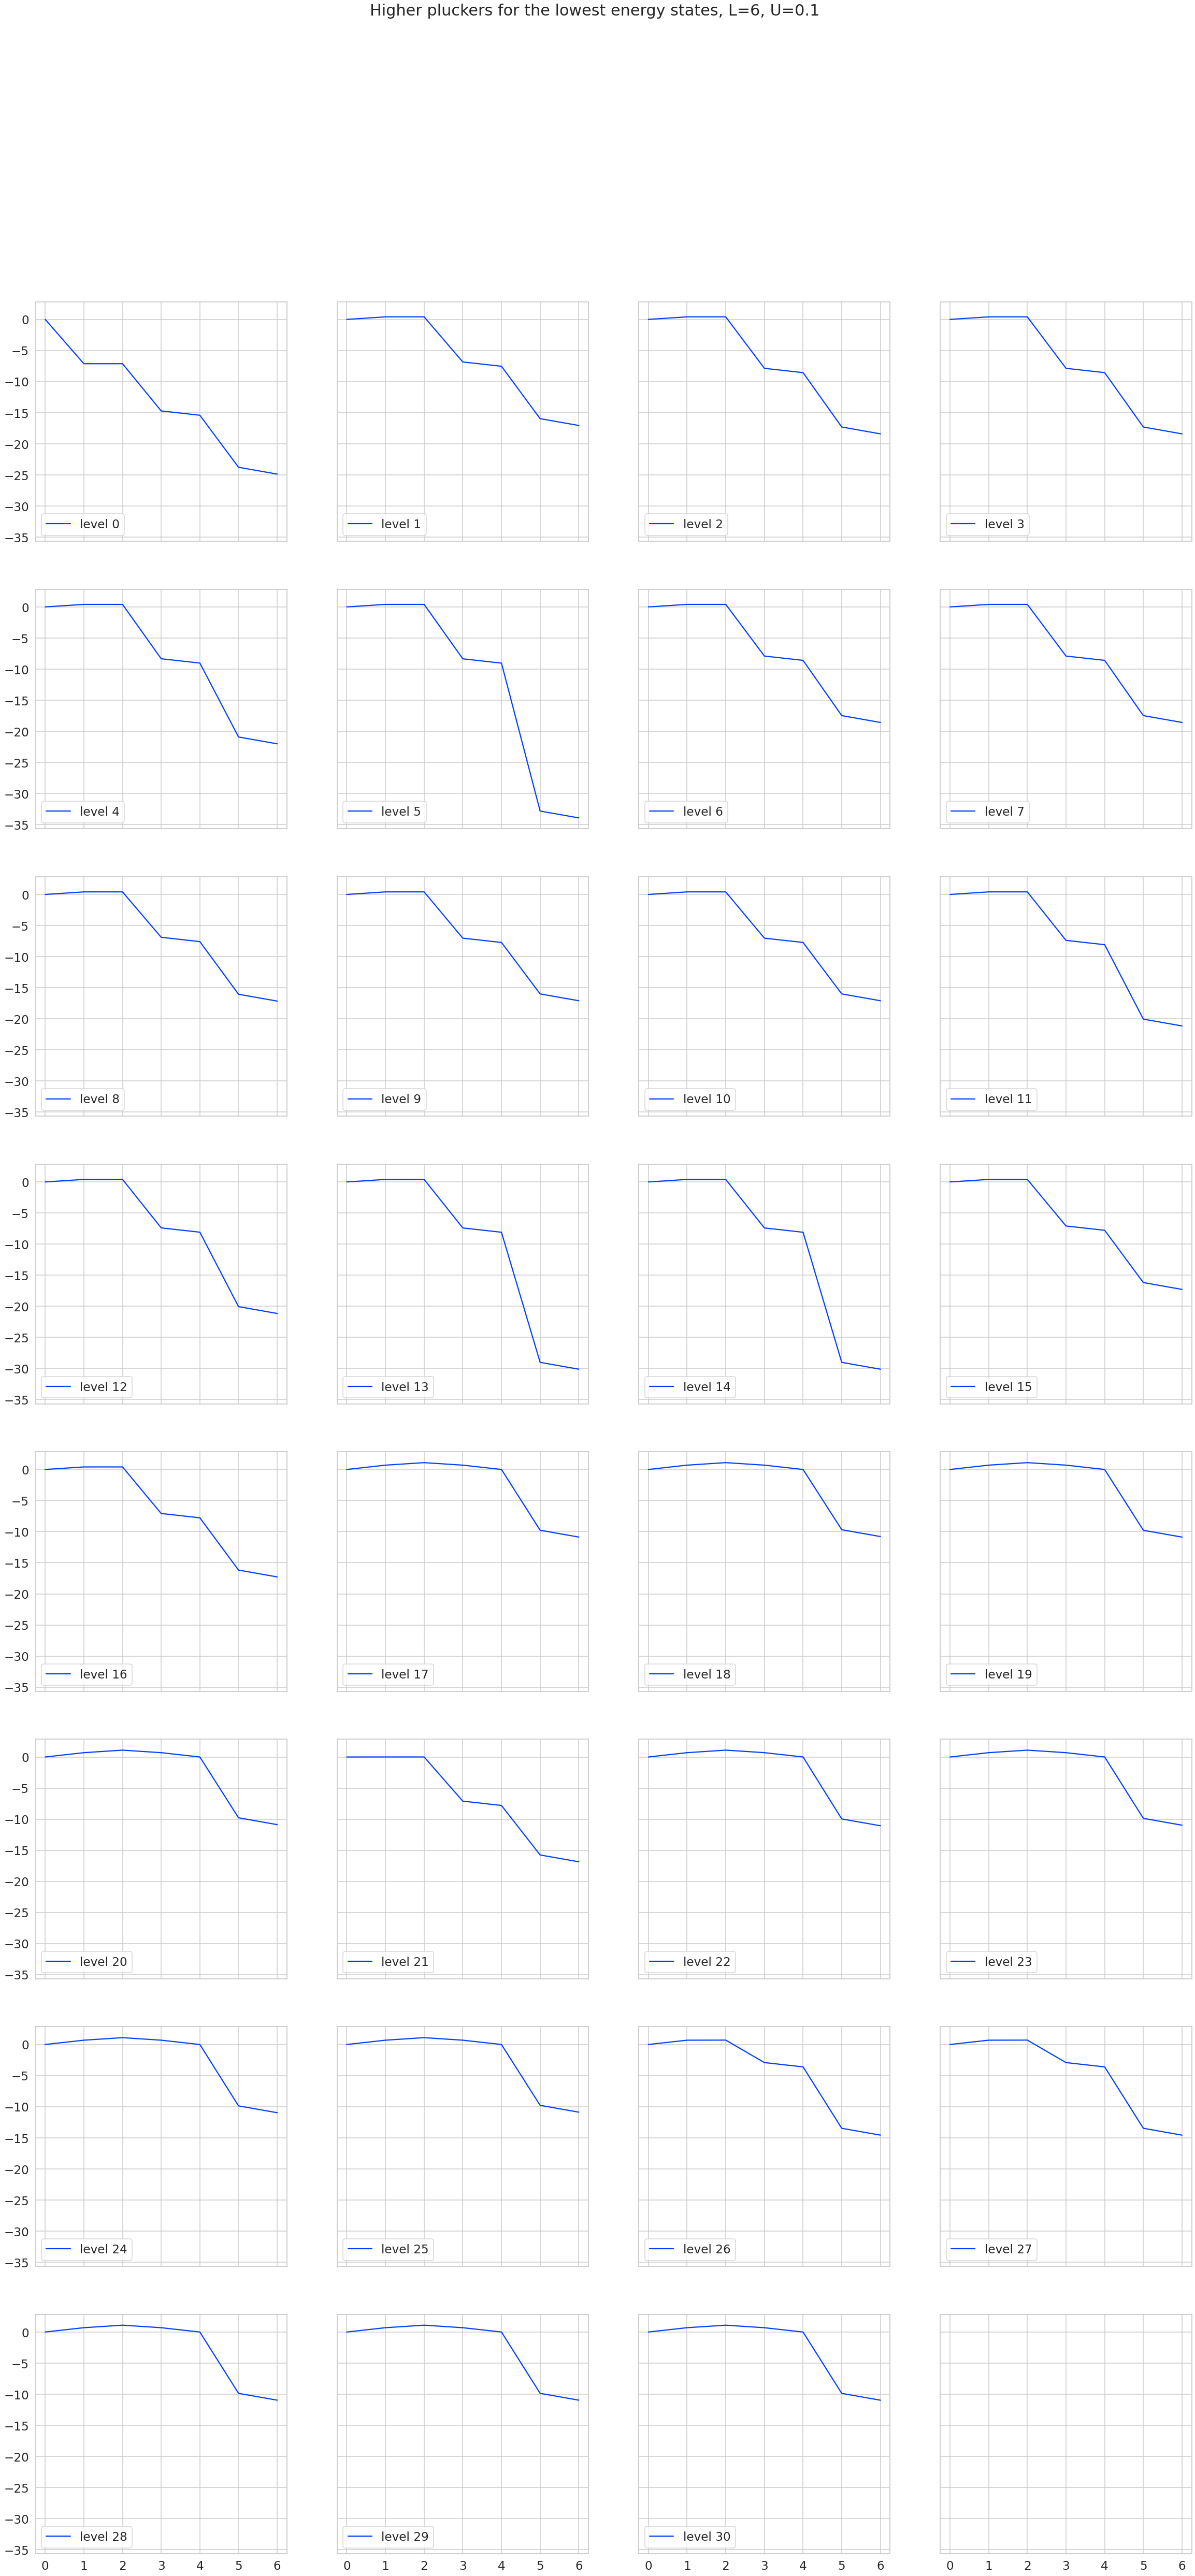

In [43]:
filling = 0.5 # half-filling
L = 6 # system size
B = np.zeros(L) # coordinate-dependent magnetic field 
U =  0.1*J # Coulomb interaction in terms of J
Nlowest = 31
levels = range(Nlowest)
Ncolumns = 4

fig, axs = plt.subplots(Nlowest//Ncolumns+1, Ncolumns, sharex=True, sharey=True)

fig.suptitle("Higher pluckers for the lowest energy states, L={}, U={}".format(L, U))
fig.set_size_inches(Ncolumns*10, (Nlowest//Ncolumns+1)*10)

for level in levels:
    filename_pluckers = folder_for_data + 'Pluckers_lowest_k={}_U={}J_L={}_Nf={}.pkl'.format(level, U, L, int(2 * L * filling))
    with open(filename_pluckers, 'rb') as f:
        C = pickle.load(f)
        #print(C)
    axs[level//Ncolumns, level%Ncolumns].plot(range(len(C)), np.log(C), label='level {}'.format(level))
    axs[level//Ncolumns, level%Ncolumns].legend(loc = 'lower left')
    #axs[(level-1)//Ncolumns, (level-1)%Ncolumns].set_aspect(1/2)
    #axs[(level-1)//Ncolumns, (level-1)%Ncolumns].set_title('Level {}'.format(level))

for ax in fig.get_axes():
    ax.label_outer()

plt.xlim([-0.25,L+0.25])
plt.savefig(folder_for_figures + 'Higher_Pluckers_Hubbard_lowest_L={}_U={}.pdf'.format(L,U))
plt.show()

## Entanglement entropy

In [41]:
filling = 0.5 # half-filling
L = 6 # system size
B = np.zeros(L) # coordinate-dependent magnetic field 
U =  10*J # Coulomb interaction in terms of J
label = "bulk"

if label=="GS":
    level = 0
    [basis, [E, vectors]] = eigensystem_k_lowest(L, U, B, 1, mu, filling)
    filename_entropies = folder_for_data + 'Entropies_GS_U={}J_L={}_Nf={}.pkl'.format(U, L, int(2 * L * filling))
    
    S = []
    for k in range(1, L): #sub-sys size
        sites = [i for i in range(k)]
        ent_val = basis.ent_entropy(np.transpose(vectors)[level], sub_sys_A=[sites, sites], return_rdm='both', return_rdm_EVs='True')
        S.append(k * ent_val['Sent_A'])
        
    with open(filename_entropies, 'wb') as f_S:
        pickle.dump(S, f_S)


if label=="bulk":
    
    [basis, [E, vectors]] = eigensystem(L, U, B, mu, filling)
    level = basis.Ns//2
    filename_entropies = folder_for_data + 'Entropies_bulk_U={}J_L={}_Nf={}.pkl'.format(U, L, int(2 * L * filling))
    
    S = []
    for k in range(1, L): #sub-sys size
        sites = [i for i in range(k)]
        ent_val = basis.ent_entropy(np.transpose(vectors)[level], sub_sys_A=[sites, sites], return_rdm='both', return_rdm_EVs='True')
        S.append(k * ent_val['Sent_A'])
        
    with open(filename_entropies, 'wb') as f_S:
        pickle.dump(S, f_S)

#### Reading data

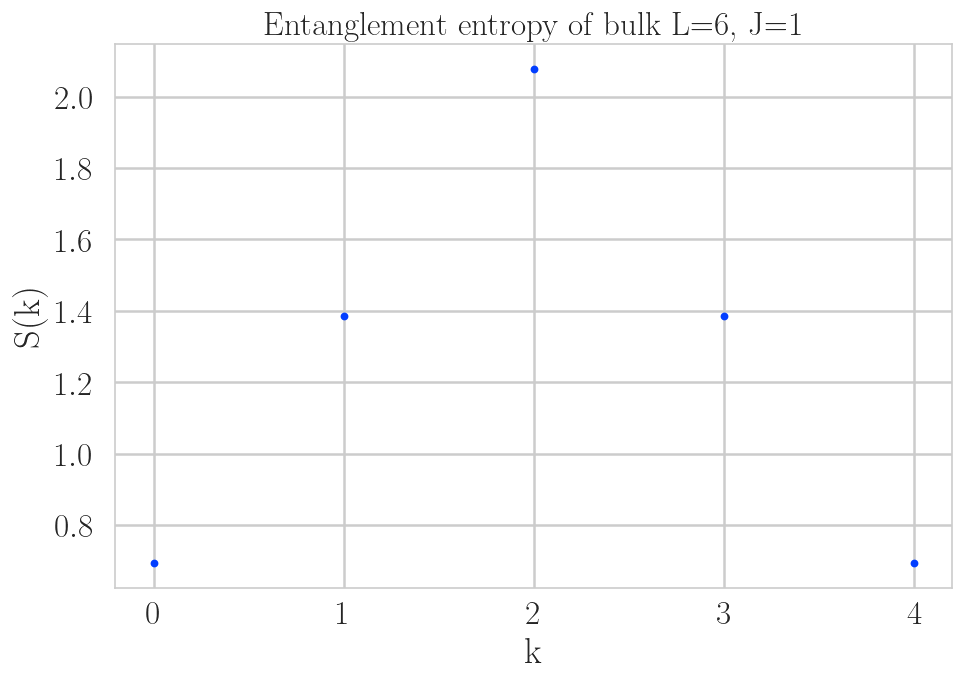

In [48]:
filling = 0.5 # half-filling
L = 6 # system size
B = np.zeros(L) # coordinate-dependent magnetic field 
U =  0.1*J # Coulomb interaction in terms of J
levels = np.linspace(0,1,11)

for level in levels:
    filename_pluckers = folder_for_data + 'Pluckers_bulk_U={}J_L={}_Nf={}.pkl'.format(U, L, int(2 * L * filling))
    with open(filename_pluckers, 'rb') as f:
         C = pickle.load(f)
    plt.scatter(range(len(C)), C, s=10, marker = 'o');

plt.title("Higher pluckers at bulk L={}, J={}".format(L, J))
plt.xlabel("k")
plt.ylabel("C(k)")

# Entropy versus Plucker

In [40]:
filling = 0.5 # half-filling
L = 6 # system size
B = np.zeros(L) # coordinate-dependent magnetic field 
U =  10*J # Coulomb interaction in terms of J
label = "bulk"


if label=="GS":
    filename_entropies = folder_for_data + 'Entropies_GS_U={}J_L={}_Nf={}.pkl'.format(U, L, int(2 * L * filling))
    with open(filename_entropies, 'rb') as f:
         S = pickle.load(f)
            
    filename_pluckers = folder_for_data + 'Pluckers_GS_U={}J_L={}_Nf={}.pkl'.format(U, L, int(2 * L * filling))
    with open(filename_pluckers, 'rb') as f:
         C = pickle.load(f)
            
            
    plt.scatter(range(len(S)), S, s=10, marker = 'o',color = 'blue',  label = 'Entanglement entropy');
    plt.scatter(range(len(C)), C, s=10, marker = '*', color = 'red', label = 'Plucker');
    plt.title("Different measures of correlations for GS, L={}, J={}".format(L, J))
    plt.xlabel("k")
    plt.ylabel("Measure")
    plt.legend()
    
if label=="bulk":
    filename_entropies = folder_for_data + 'Entropies_bulk_U={}J_L={}_Nf={}.pkl'.format(U, L, int(2 * L * filling))
    with open(filename_entropies, 'rb') as f:
         S = pickle.load(f)
            
    filename_pluckers = folder_for_data + 'Pluckers_bulk_U={}J_L={}_Nf={}.pkl'.format(U, L, int(2 * L * filling))
    with open(filename_pluckers, 'rb') as f:
         C = pickle.load(f)
            

FileNotFoundError: [Errno 2] No such file or directory: 'results_Hubbard/data_Hubbard/Entropies_bulk_U=10J_L=6_Nf=6.pkl'

#### Plotting

In [ ]:
plt.scatter(range(len(S)), S, s=10, marker = 'o', color = 'blue', label = 'Entanglement entropy');
plt.scatter(range(len(C)), C, s=10, marker = '*',color = 'red',  label = 'Plucker');
plt.title("Different measures of correlations for the {} state of the Hubbard system, L={}, Nf={}, J={}".format(label, L,Nf,  J))
plt.xlabel("k")
plt.ylabel("Measure")
plt.legend()